In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC


import timeit
import warnings
warnings.filterwarnings("ignore")

### Load the dfs

In [2]:
df = pd.read_csv('data_for_model.csv', usecols = ['review_rating' , 'Reviews_tokenize_join'])

In [3]:
# optimazation memory by converting the review_rating to category
df['target'] = df['review_rating'].astype('category')

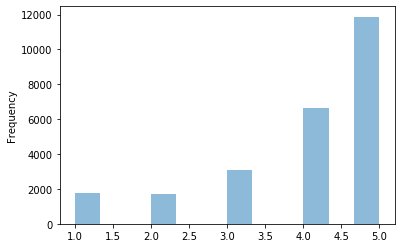

In [5]:
df['review_rating'].plot.hist(bins=12, alpha=0.5)

In [6]:
df['target'].value_counts()


5    11878
4     6622
3     3074
1     1741
2     1735
Name: target, dtype: int64

In [5]:
#df.info()
# df['target'] = df['review_rating'].apply(lambda x: str(x))

In [22]:
# df['target'] = df['review_rating'].astype('category')

In [329]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25050 entries, 0 to 25049
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   review_rating          25050 non-null  object
 1   Reviews_tokenize_join  25050 non-null  object
 2   target                 25050 non-null  object
 3   new                    0 non-null      object
 4   binamial_target        25050 non-null  object
dtypes: object(5)
memory usage: 978.6+ KB


,review_rating,Reviews_tokenize_join,target,new,binamial_target
0,1,start say understand hard time city country en...,Bad,NaN,Bad
1,5,wonderful visit time park view thank upgrade l...,Bad,NaN,Good
2,5,good hotel stay absolutely worth money view ce...,Bad,NaN,Good
3,5,fantastic location spot step central park view...,Bad,NaN,Good
4,5,amazing park view nicole staff professional fr...,Bad,NaN,Good


In [63]:
# # classifier(LinearSVC())
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfTransformer
# from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score


In [11]:
def clf(model ,col1,col):
    start = timeit.timeit()

    X_train, X_test, y_train, y_test = train_test_split(df[col1], df[col] , test_size=0.3, random_state = 42)

    classification_model = Pipeline([('vect', TfidfVectorizer(ngram_range=(1, 2), stop_words="english", sublinear_tf=True)),
                         ('chi',  SelectKBest(chi2, k=10000)),
                   ('clf', model)])

    classification_model.fit(X_train, y_train)
    
    
    
    preds = classification_model.predict(X_test)
    end = timeit.timeit()
    final_time = start - end

    list_names = ['Model','Accuracy_score','Recall_score','Precision_score','F1_score', 'Time']
    score_list = []
    accuracy = accuracy_score(y_test, preds)
    recall = recall_score(y_test, preds,average=None, pos_label='Good')
    precision = precision_score(y_test, preds,average=None, pos_label='Good')
    f_1 = f1_score(y_test , preds,average=None, pos_label='Good')
#     roc_auc = metrics.roc_auc_score(y_test, preds)
    final_time = start - end

    score_list.extend([model,accuracy,recall,precision,f_1,final_time])
    dictionary = dict(zip(list_names, score_list))
    return dictionary

In [95]:
# def clf(model):
#     start = timeit.timeit()

#     X_train, X_test, y_train, y_test = train_test_split(df['Reviews_tokenize_join'] ,df['target'], test_size=0.3, random_state = 42)

#     classification_model = Pipeline([('vect', TfidfVectorizer(ngram_range=(1, 2), stop_words="english", sublinear_tf=True)),
#                          ('chi',  SelectKBest(chi2, k=10000)),
#                    ('clf', model)])

# #     dt_cv_score = cross_val_score(nb, X_train, y_train, cv=3)
# #     mean_dt_cv_score = np.mean(dt_cv_score)

# #     print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")
#     classification_model.fit(X_train, y_train)

#     y_pred = classification_model.predict(X_test)
#     end = timeit.timeit()
#     print(f'Classier:{model} , Time: {start - end}')
#     print(f'Accuracy: {accuracy_score(y_pred, y_test)}')
#     print(classification_report(y_test, y_pred))

### Logistic Regresion Baseline model

In [13]:
lg_multi_class = clf(LogisticRegression() , 'Reviews_tokenize_join', 'target')
lg_multi_class

{'Model': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='warn', tol=0.0001, verbose=0,
                    warm_start=False),
 'Accuracy_score': 0.5961410512308716,
 'Recall_score': array([0.54420432, 0.03214286, 0.24946004, 0.39164619, 0.90588235]),
 'Precision_score': array([0.57708333, 0.3       , 0.37806874, 0.47412255, 0.67414051]),
 'F1_score': array([0.56016178, 0.05806452, 0.30058556, 0.42895587, 0.77301665]),
 'Time': 0.0018814630000179022}

In [ ]:
lg_multi_class

### Mutinomial NB

In [96]:
nb_multi_class = clf(MultinomialNB(),'Reviews_tokenize_join', 'target')

Classier:MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) , Time: 0.0022849209990454256
Accuracy: 0.474251497005988
              precision    recall  f1-score   support

           1       1.00      0.01      0.02       509
           2       0.00      0.00      0.00       560
           3       0.09      0.01      0.01       926
           4       0.12      0.04      0.06      2035
           5       0.51      1.00      0.67      3485

    accuracy                           0.47      7515
   macro avg       0.34      0.21      0.15      7515
weighted avg       0.35      0.47      0.33      7515



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
nb_multi_class

### Decision Tree Classifier

In [99]:
dt_mult_class = (DecisionTreeClassifier(), 'Reviews_tokenize_join', 'target')

Classier:DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best') , Time: 0.004389895000713295
Accuracy: 0.4637391882900865
              precision    recall  f1-score   support

           1       0.37      0.32      0.34       509
           2       0.21      0.15      0.18       560
           3       0.24      0.23      0.23       926
           4       0.35      0.36      0.36      2035
           5       0.62      0.66      0.64      3485

    accuracy                           0.46      7515
   macro avg       0.36      0.34      0.35      7515
weighted avg       0.45      0.46      0.46      7515



### Linear Support Vector Machine with stochastic gradient descent (SGD)


In [100]:
# clf(SGDClassifier())

Classier:SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False) , Time: 0.0028529249993880512
Accuracy: 0.589620758483034
              precision    recall  f1-score   support

           1       0.46      0.75      0.57       509
           2       0.33      0.10      0.16       560
           3       0.46      0.26      0.33       926
           4       0.50      0.19      0.28      2035
           5       0.64      0.97      0.77      3485

    accuracy                           0.59      7515
   macro avg       0.48      0.45      0.42      7515
weighted avg       0.55      0.59      0.52      7515



In [66]:
# with cross validation
# clf(SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None))

<IPython.core.display.Javascript object>

Mean Cross Validation Score: 53.50%
Classier:SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=None, validation_fraction=0.1,
              verbose=0, warm_start=False) , Time: 0.0021226449998721364
Accuracy: 0.5141716566866268
              precision    recall  f1-score   support

           1       0.48      0.45      0.46       509
           2       0.36      0.08      0.13       560
           3       0.34      0.06      0.11       926
           4       0.38      0.03      0.06      2035
           5       0.53      1.00      0.69      3485

    accuracy                           0.51      7515
   macro avg       0.42      0.32      0.29      7515
weighted avg       0.45      0.51      0.39  

In [57]:
# clf(SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None))

Classier:SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=None, validation_fraction=0.1,
              verbose=0, warm_start=False) , Time: 0.00526697400005105
Accuracy: 0.5141716566866268
              precision    recall  f1-score   support

           1       0.48      0.45      0.46       509
           2       0.36      0.08      0.13       560
           3       0.34      0.06      0.11       926
           4       0.38      0.03      0.06      2035
           5       0.53      1.00      0.69      3485

    accuracy                           0.51      7515
   macro avg       0.42      0.32      0.29      7515
weighted avg       0.45      0.51      0.39      7515



### Linear Support Vector Classification

In [102]:
svc_multi_class = clf(LinearSVC(),'Reviews_tokenize_join', 'target')

Classier:LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0) , Time: 0.0006291960016824305
Accuracy: 0.6087824351297405
              precision    recall  f1-score   support

           1       0.54      0.59      0.56       509
           2       0.35      0.14      0.20       560
           3       0.40      0.36      0.38       926
           4       0.50      0.41      0.45      2035
           5       0.72      0.87      0.79      3485

    accuracy                           0.61      7515
   macro avg       0.50      0.47      0.48      7515
weighted avg       0.58      0.61      0.59      7515



In [60]:
# clf(LinearSVC(C=1.0, penalty='l1', max_iter=3000, dual=False))

Classier:LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=3000,
          multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
          verbose=0) , Time: 0.001874255000075209
Accuracy: 0.6059880239520958
              precision    recall  f1-score   support

           1       0.51      0.64      0.57       509
           2       0.33      0.16      0.21       560
           3       0.39      0.31      0.34       926
           4       0.50      0.40      0.45      2035
           5       0.72      0.87      0.79      3485

    accuracy                           0.61      7515
   macro avg       0.49      0.48      0.47      7515
weighted avg       0.57      0.61      0.58      7515



### Random Forest Classifier

In [103]:
rf_multi_class = clf(RandomForestClassifier(),'Reviews_tokenize_join', 'target')

<IPython.core.display.Javascript object>

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Classier:RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) , Time: -0.0008938350001699291
Accuracy: 0.5123087159015303
              precision    recall  f1-score   support

           1       0.47      0.33      0.39       509
           2       0.33      0.08      0.12       560
           3       0.31      0.18      0.23       926
           4       0.35      0.33      0.34      2035
           5       0.61      0.80      0.69      3485

    accuracy                           0.51      7515
   macro avg       0.42      0.34      0.36      7515
weighte

In [81]:
# def clf_gs(model):
    
#     X_train, X_test, y_train, y_test = train_test_split(df['Reviews_tokenize_join'] ,df['target'], test_size=0.3, random_state = 42)

#     nb = Pipeline([('vect', TfidfVectorizer(ngram_range=(1, 2), stop_words="english", sublinear_tf=True)),
#                          ('chi',  SelectKBest(chi2, k=10000)),
#                    ('clf', model)])
#     parameters = {'clf__penalty':['l1', 'l2'], 'clf__C':[0.001,0.1,10,100,10e5] , 'clf__gamma':[0.1,0.01]}
#     # Instantiate GridSearchCV
#     dt_grid_search = GridSearchCV(nb, parameters, cv=3, return_train_score=True)
    
#     dt_grid_search.fit(X_train, y_train)
#     # Mean training score
#     dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

#     # Mean test score
#     dt_gs_testing_score = dt_grid_search.score(X_test, y_test)

#     print(f"Mean Training Score: {dt_gs_training_score :.2%}")
#     print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
#     print("Best Parameter Combination Found During Grid Search:")
#     dt_grid_search.best_params_


 
    

## Tuning hyperparameters

In [106]:
# def clf_grid(model , parameteres):   
#     X_train, X_test, y_train, y_test = train_test_split(df['Reviews_tokenize_join'] ,df['target'], test_size=0.3, random_state = 42)

#     pipeline = Pipeline([('vect', TfidfVectorizer(ngram_range=(1, 2), stop_words="english", sublinear_tf=True)),
#                          ('chi',  SelectKBest(chi2, k=10000)),
#                          ('clf', model)])
#     grid = GridSearchCV(pipeline, param_grid=parameteres, cv=5)
#     grid.fit(X_train, y_train)
#     print(f'accuracy:{grid.score(X_test,y_test)}')
#     print(f'Best parameters : {grid.best_params_}')


In [19]:
def clf_grid(model ,col,col1, parameteres):  
    start = timeit.timeit()

    X_train, X_test, y_train, y_test = train_test_split(df['Reviews_tokenize_join'] ,df['target'], test_size=0.3, random_state = 42)

    pipeline = Pipeline([('vect', TfidfVectorizer(ngram_range=(1, 2), stop_words="english", sublinear_tf=True)),
                         ('chi',  SelectKBest(chi2, k=10000)),
                         ('clf', model)])
    grid = GridSearchCV(pipeline, param_grid=parameteres, cv=5)
    grid.fit(X_train, y_train)
    m_best = grid.best_estimator_
    y_pred = m_best.predict(X_test)


    end = timeit.timeit()
    final_time = start - end

    list_names = ['Model','Accuracy_score','Recall_score','Precision_score','F1_score', 'Time']
    score_list = []
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred,average=None, pos_label='Good')
    precision = precision_score(y_test, y_pred,average=None, pos_label='Good')
    f_1 = f1_score(y_test , y_pred,average=None, pos_label='Good')
#     roc_auc = metrics.roc_auc_score(y_test, preds)
    final_time = start - end

    score_list.extend([model,accuracy,recall,precision,f_1,final_time])
    dictionary = dict(zip(list_names, score_list))
    return dictionary


### Logistic Regresion with GridSearchCV 

In [20]:
lg_multi_grid = clf_grid(LogisticRegression(),'Reviews_tokenize_join', 'target',parameteres = {'clf__C':[0.01, 0.1, 1, 10, 100] })

In [21]:
lg_multi_grid

{'Model': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='warn', tol=0.0001, verbose=0,
                    warm_start=False),
 'Accuracy_score': 0.6127744510978044,
 'Recall_score': array([0.5481336 , 0.15714286, 0.39416847, 0.42948403, 0.86054519]),
 'Precision_score': array([0.5625    , 0.34509804, 0.42491269, 0.50432776, 0.71883988]),
 'F1_score': array([0.55522388, 0.21595092, 0.40896359, 0.46390658, 0.78333551]),
 'Time': 0.001937517999863303}

### Multinomial NB

In [110]:
nb_muti_grid = clf_grid(MultinomialNB(),'Reviews_tokenize_join', 'target', parameteres = {'clf__alpha': np.linspace(0.5, 1.5, 6), 'clf__fit_prior': [True, False]})

<IPython.core.display.Javascript object>

accuracy:0.5958749168330006
Best parameters : {'clf__alpha': 0.5, 'clf__fit_prior': False}


In [ ]:
nb_muti_grid 

### Decision Tree Classifier

In [113]:
dt_multi_grid = clf_grid(DecisionTreeClassifier(),'Reviews_tokenize_join', 'target',parameteres = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [None, 2, 3, 4, 5, 6],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 3, 4, 5, 6]
})

accuracy:0.5076513639387891
Best parameters : {'clf__criterion': 'gini', 'clf__max_depth': 6, 'clf__min_samples_leaf': 3, 'clf__min_samples_split': 5}


In [ ]:
dt_multi_grid

In [ ]:
### Random Forest Classifier

In [ ]:
rf_multi_grid = clf_grid(RandomForestClassifier(),'Reviews_tokenize_join', 'target', parameteres = {
    'clf__n_estimators': [10, 30, 100],
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [None, 2, 6, 10],
    'clf__min_samples_split': [5, 10],
    'clf__min_samples_leaf': [3, 6]
})

In [ ]:
rf_multi_grid

In [ ]:
### Linear Support Vector Classification with GridSearchCV 

### Linear Support Vector Classification 

In [107]:
svc_multi_grid = clf_grid(LinearSVC(), 'Reviews_tokenize_join', 'target' ,parameteres = {'clf__C':[0.001,0.1,10,100,10e5], 'clf__max_iter':[1000, 2000,3000]})

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


accuracy:0.5984031936127745
Best parameters : {'clf__C': 0.1, 'clf__max_iter': 1000}


In [ ]:
svc_multi_grid

## Change target to 3 categories


In [25]:
# df_tree_categories = df.replace({5: 'good', 4: 'neutral', 3: 'bad' , 2: 'bad', 1: 'bad'})
# df_tree_categories.head()
df['tri_target'] = 'Bad'
df.loc[df['review_rating'] == 5, 'tri_target'] = 'Good'
df.loc[df['review_rating'] == 4, 'tri_target'] = 'Neutral'

In [27]:
df['tri_target'].value_counts()

Good       11878
Neutral     6622
Bad         6550
Name: tri_target, dtype: int64

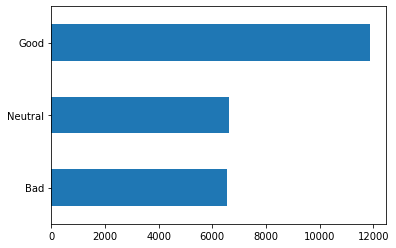

In [28]:
# df_tree_categories['target'].plot.bar(bins=12, alpha=0.5)
df['tri_target'].value_counts().sort_values().plot(kind = 'barh')


In [202]:
# def clf(model):
#     start = timeit.timeit()

#     X_train, X_test, y_train, y_test = train_test_split(df_tree_categories['Reviews_tokenize_join'],df_tree_categories['target'] , test_size=0.3, random_state = 42)

#     classification_model = Pipeline([('vect', TfidfVectorizer(ngram_range=(1, 2), stop_words="english", sublinear_tf=True)),
#                          ('chi',  SelectKBest(chi2, k=10000)),
#                    ('clf', model)])

# #     dt_cv_score = cross_val_score(nb, X_train, y_train, cv=3)
# #     mean_dt_cv_score = np.mean(dt_cv_score)

# #     print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")
#     classification_model.fit(X_train, y_train)

#     y_pred = classification_model.predict(X_test)
#     end = timeit.timeit()
#     print(f'Classier:{model} , Time: {start - end}')
#     accuracy = round(accuracy_score(y_pred, y_test) * 100 ,2)
#     print(f'Accuracy: {accuracy}')
#     print(classification_report(y_test, y_pred))

In [198]:
# def clf(df, col, model):
#     try:
#         start = timeit.timeit()

#         X_train, X_test, y_train, y_test = train_test_split(df[col],df[col] , test_size=0.3, random_state = 42)

#         classification_model = Pipeline([('vect', TfidfVectorizer(ngram_range=(1, 2), stop_words="english", sublinear_tf=True)),
#                              ('chi',  SelectKBest(chi2, k=10000)),
#                        ('clf', model)])

#     #     dt_cv_score = cross_val_score(nb, X_train, y_train, cv=3)
#     #     mean_dt_cv_score = np.mean(dt_cv_score)

#     #     print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")
#         classification_model.fit(X_train, y_train)

#         y_pred = classification_model.predict(X_test)
#         end = timeit.timeit()
#         print(f'Classier:{model} , Time: {start - end}')
#         accuracy = round(accuracy_score(y_pred, y_test) * 100 ,2)
#         print(f'Accuracy: {accuracy}')
#         print(classification_report(y_test, y_pred))
   

In [200]:
# clf(df_tree_categories['Reviews_tokenize_join'],df_tree_categories['target'] ,LogisticRegression())


## Logistic Regressiom

In [29]:
ld_tri_class =clf( LogisticRegression(), 'Reviews_tokenize_join', 'tri_target')


In [30]:
ld_tri_class 

{'Model': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='warn', tol=0.0001, verbose=0,
                    warm_start=False),
 'Accuracy_score': 0.7161676646706587,
 'Recall_score': array([0.81954887, 0.88579627, 0.32432432]),
 'Precision_score': array([0.80225711, 0.71491431, 0.56945643]),
 'F1_score': array([0.81081081, 0.79123414, 0.41327489]),
 'Time': 0.002936557999873912}

### Decision Tree Classifier

In [203]:
dt_tri_class = clf(DecisionTreeClassifier(), 'Reviews_tokenize_join', 'tri_target')

Classier:DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best') , Time: 0.004610341005900409
Accuracy: 53.4
              precision    recall  f1-score   support

         bad       0.61      0.50      0.55      1995
        good       0.61      0.66      0.64      3485
     neutral       0.33      0.35      0.34      2035

    accuracy                           0.53      7515
   macro avg       0.52      0.50      0.51      7515
weighted avg       0.54      0.53      0.53      7515



In [ ]:
dt_tri_class

### Mutinomial NB

In [204]:
nb_tri_class = clf(MultinomialNB(), 'Reviews_tokenize_join', 'tri_target')

Classier:MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) , Time: 0.0046771149936830625
Accuracy: 65.38
              precision    recall  f1-score   support

         bad       0.87      0.68      0.77      1995
        good       0.60      0.98      0.75      3485
     neutral       0.47      0.06      0.11      2035

    accuracy                           0.65      7515
   macro avg       0.65      0.58      0.54      7515
weighted avg       0.64      0.65      0.58      7515



In [ ]:
nb_tri_class

### Linear Support Vector Machine with stochastic gradient descent (SGD)


In [205]:
sgd_tri_class= clf(SGDClassifier(), 'Reviews_tokenize_join', 'tri_target')

Classier:SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False) , Time: 0.004174531000899151
Accuracy: 70.39
              precision    recall  f1-score   support

         bad       0.73      0.89      0.81      1995
        good       0.69      0.94      0.80      3485
     neutral       0.68      0.11      0.20      2035

    accuracy                           0.70      7515
   macro avg       0.70      0.65      0.60      7515
weighted avg       0.70      0.70      0.64      7515



### Linear Support Vector Classification

In [206]:
svc_tri_class = clf(LinearSVC(), 'Reviews_tokenize_join', 'tri_target')

Classier:LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0) , Time: 0.003260140001657419
Accuracy: 71.32
              precision    recall  f1-score   support

         bad       0.79      0.83      0.81      1995
        good       0.74      0.85      0.79      3485
     neutral       0.53      0.36      0.43      2035

    accuracy                           0.71      7515
   macro avg       0.69      0.68      0.68      7515
weighted avg       0.69      0.71      0.70      7515



In [ ]:
svc_tri_class

### Random Forest Classifier

In [207]:
rf_tri_class = clf(RandomForestClassifier(), 'Reviews_tokenize_join', 'tri_target')

Classier:RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) , Time: 0.004170633001194801
Accuracy: 62.69
              precision    recall  f1-score   support

         bad       0.74      0.62      0.67      1995
        good       0.63      0.89      0.73      3485
     neutral       0.43      0.19      0.26      2035

    accuracy                           0.63      7515
   macro avg       0.60      0.57      0.56      7515
weighted avg       0.60      0.63      0.59      7515



In [ ]:
rf_tri_class

In [ ]:
### Tunning hyperparameters

In [241]:
# def clf_grid(df, model , parameteres):   
#     X_train, X_test, y_train, y_test = train_test_split(df['Reviews_tokenize_join'] ,df['target'], test_size=0.3, random_state = 42)

#     pipeline = Pipeline([('vect', TfidfVectorizer(ngram_range=(1, 2), stop_words="english", sublinear_tf=True)),
#                          ('chi',  SelectKBest(chi2, k=10000)),
#                          ('clf', model)])
#     grid = GridSearchCV(pipeline, param_grid=parameteres, cv=5)
#     grid.fit(X_train, y_train)
#     print(f'accuracy:{grid.score(X_test,y_test)}')
#     print(f'Best parameters : {grid.best_params_}')


### Loigistic Regression

In [249]:
lg_tri_grid = clf_grid(LogisticRegression(),'Reviews_tokenize_join', 'tri_target', parameteres ={'clf__penalty' : ['l1', 'l2'],
# 'clf__C' : [ 0.001, 0.01, 0.1, 1, 10, 100],
# 'clf__solver': ['liblinear', 'saga']})

accuracy:0.7161676646706587
Best parameters : {'clf__C': 1, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}


In [210]:
clf_grid(df_tree_categories, LogisticRegression(),'Reviews_tokenize_join', 'tri_target',parameters_lg)

accuracy:0.7161676646706587
Best parameters : {'clf__C': 1}


### Decision Tree Classifier

In [ ]:
dt_tri_grid = clf_grid( DecisionTreeClassifier(),'Reviews_tokenize_join', 'tri_target', parameteres = {
#     'clf__criterion': ['gini', 'entropy'],
#     'clf__max_depth': [None, 2, 3, 4, 5, 6],
#     'clf__min_samples_split': [2, 5, 10],
#     'clf__min_samples_leaf': [1, 2, 3, 4, 5, 6]
# })

### Multinomial NB

In [211]:
nb_tri_grid = clf_grid( MultinomialNB(),'Reviews_tokenize_join', 'tri_target', parameteres = {'clf__alpha': np.linspace(0.5, 1.5, 6), 'clf__fit_prior': [True, False]})

<IPython.core.display.Javascript object>

accuracy:0.7153692614770459
Best parameters : {'clf__alpha': 0.5, 'clf__fit_prior': False}


### Linear Support Vector Classification

In [213]:
svc_tri_grid = clf_grid( LinearSVC() , 'Reviews_tokenize_join', 'tri_target',parameteres = {'clf__C':[0.001,0.1,10,100,10e5], 'clf__max_iter':[1000, 2000,3000]})

accuracy:0.7166999334664005
Best parameters : {'clf__C': 0.1, 'clf__max_iter': 1000}


### Random Forest Classifier

In [ ]:
rf_tri_grid = clf_grid( RandomForestClassifier(), 'Reviews_tokenize_join', 'tri_target', parameteres = {
#     'clf__n_estimators': [10, 30, 100],
#     'clf__criterion': ['gini', 'entropy'],
#     'clf__max_depth': [None, 2, 6, 10],
#     'clf__min_samples_split': [5, 10],
#     'clf__min_samples_leaf': [3, 6]
# })

## Change target to 2 categories


In [35]:
df['bi_target'] = 'Bad'


In [36]:
df.loc[df['review_rating'] == 5, 'bi_target'] = 'Good'

In [37]:
df.binamial_target.value_counts(normalize = True)
df.head()

,review_rating,Reviews_tokenize_join,target,tri_target,binamial_target,bi_target
0,1,start say understand hard time city country en...,1,Bad,Bad,Bad
1,5,wonderful visit time park view thank upgrade l...,5,Good,Good,Good
2,5,good hotel stay absolutely worth money view ce...,5,Good,Good,Good
3,5,fantastic location spot step central park view...,5,Good,Good,Good
4,5,amazing park view nicole staff professional fr...,5,Good,Good,Good


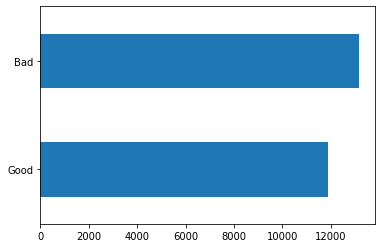

In [265]:
df['bi_target'].value_counts().sort_values().plot(kind = 'barh')


In [279]:
def clf(model):
    start = timeit.timeit()

    X_train, X_test, y_train, y_test = train_test_split(df['Reviews_tokenize_join'],df['binamial_target'] , test_size=0.3, random_state = 42)

    classification_model = Pipeline([('vect', TfidfVectorizer(ngram_range=(1, 2), stop_words="english", sublinear_tf=True)),
                         ('chi',  SelectKBest(chi2, k=10000)),
                   ('clf', model)])

    classification_model.fit(X_train, y_train)
    y_pred = classification_model.predict(X_test)
    
    end = timeit.timeit()
    final = start - end
    
    
    accuracy = round(accuracy_score(y_pred, y_test) * 100 ,2)
    precesion  = round(precision_score(y_pred, y_test) *100 , 2)
    recal = recall_score(y_pred, y_test)
    f1_score = f1_score(y_pred, y_test)

    return ({
        'Time': final,
        'Accuracy_Score': test_accuracy,
        'Precision_Score': precesion,
        'Recal_Score' : recal,
        'F1_Score': f1_score
    })

In [ ]:
# def print_metrics(labels, preds):
#     print("Precision Score: {}".format(precision_score(labels, preds)))
#     print("Recall Score: {}".format(recall_score(labels, preds)))
#     print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
#     print("F1 Score: {}".format(f1_score(labels, preds)))

In [280]:
lg_bi_class = clf( LogisticRegression(), 'Reviews_tokenize_join', 'bi_target')


ValueError: pos_label=1 is not a valid label: array(['Bad', 'Good'], dtype='<U4')

In [321]:
def clf_ll(model ,col1,col):

    X_train, X_test, y_train, y_test = train_test_split(df[col1], df[col] , test_size=0.3, random_state = 42)

    classification_model = Pipeline([('vect', TfidfVectorizer(ngram_range=(1, 2), stop_words="english", sublinear_tf=True)),
                         ('chi',  SelectKBest(chi2, k=10000)),
                   ('clf', model)])

    classification_model.fit(X_train, y_train)
    
    
    
    preds = classification_model.predict(X_test)
    list_names = ['Model','Accuracy_score','Recall_score','Precision_score','F1_score']
    score_list = []
    accuracy = accuracy_score(y_test, preds)
    recall = recall_score(y_test, preds, pos_label='Good')
    precision = precision_score(y_test, preds, pos_label='Good')
    f_1 = f1_score(y_test , preds, pos_label='Good')
#     roc_auc = metrics.roc_auc_score(y_test, preds)
    score_list.extend([model,accuracy,recall,precision,f_1])
    dictionary = dict(zip(list_names, score_list))
    return dictionary

In [ ]:
dt_bi_class = clf(DecisionTreeClassifier(), 'Reviews_tokenize_join', 'bi_target')

In [270]:
nb_bi_class = clf(MultinomialNB(), 'Reviews_tokenize_join', 'bi_target')

Classier:MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) , Time: 0.003956167995056603
Accuracy: 80.41
              precision    recall  f1-score   support

         Bad       0.83      0.80      0.81      4030
        Good       0.78      0.81      0.79      3485

    accuracy                           0.80      7515
   macro avg       0.80      0.80      0.80      7515
weighted avg       0.81      0.80      0.80      7515



In [271]:
clf(SGDClassifier(), 'Reviews_tokenize_join', 'bi_target')

Classier:SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False) , Time: 0.0029596269960165955
Accuracy: 80.56
              precision    recall  f1-score   support

         Bad       0.84      0.79      0.81      4030
        Good       0.77      0.82      0.80      3485

    accuracy                           0.81      7515
   macro avg       0.81      0.81      0.81      7515
weighted avg       0.81      0.81      0.81      7515



In [272]:
clf(LinearSVC(), 'Reviews_tokenize_join', 'bi_target')

Classier:LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0) , Time: 0.003953686995373573
Accuracy: 80.49
              precision    recall  f1-score   support

         Bad       0.83      0.79      0.81      4030
        Good       0.77      0.82      0.80      3485

    accuracy                           0.80      7515
   macro avg       0.80      0.81      0.80      7515
weighted avg       0.81      0.80      0.81      7515



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['Reviews_tokenize_join'] ,df['target'], test_size=0.3, random_state = 42)

pipeline = Pipeline([('vect', TfidfVectorizer(ngram_range=(1, 2), stop_words="english", sublinear_tf=True)),
                     ('chi',  SelectKBest(chi2, k=10000)),
                     ('clf', LinearSVC())])

In [87]:
parameteres = {'clf__C':[0.001,0.1,10,100,10e5], 'clf__max_iter':[1000, 2000,3000]}

In [88]:
grid = GridSearchCV(pipeline, param_grid=parameteres, cv=5)


In [89]:
grid.fit(X_train, y_train)


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 2),
                                          

In [90]:
print(grid.score(X_test,y_test))

0.6217564870259481


In [91]:
grid.best_params_

{'clf__C': 0.1, 'clf__max_iter': 1000}

In [92]:
clf(LinearSVC(C=0.1, penalty='l1', max_iter=1000, dual=False))

<IPython.core.display.Javascript object>

Mean Cross Validation Score: 56.49%
Classier:LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
          verbose=0) , Time: 0.0035134449990437133
Accuracy: 0.5720558882235529
              precision    recall  f1-score   support

           1       0.52      0.49      0.50       509
           2       0.33      0.03      0.05       560
           3       0.35      0.12      0.17       926
           4       0.42      0.35      0.38      2035
           5       0.65      0.92      0.76      3485

    accuracy                           0.57      7515
   macro avg       0.45      0.38      0.37      7515
weighted avg       0.52      0.57      0.51      7515



In [93]:
clf(LinearSVC(C=0.1, max_iter=1000))

<IPython.core.display.Javascript object>

Mean Cross Validation Score: 59.54%
Classier:LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0) , Time: 0.004986515999917174
Accuracy: 0.5984031936127745
              precision    recall  f1-score   support

           1       0.55      0.61      0.57       509
           2       0.40      0.04      0.08       560
           3       0.40      0.23      0.29       926
           4       0.48      0.37      0.41      2035
           5       0.67      0.92      0.77      3485

    accuracy                           0.60      7515
   macro avg       0.50      0.43      0.43      7515
weighted avg       0.56      0.60      0.55      7515



In [94]:
clf(LinearSVC())

<IPython.core.display.Javascript object>

Mean Cross Validation Score: 60.98%
Classier:LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0) , Time: 0.006638550999923609
Accuracy: 0.6087824351297405
              precision    recall  f1-score   support

           1       0.54      0.59      0.56       509
           2       0.35      0.14      0.20       560
           3       0.40      0.36      0.38       926
           4       0.50      0.41      0.45      2035
           5       0.72      0.87      0.79      3485

    accuracy                           0.61      7515
   macro avg       0.50      0.47      0.48      7515
weighted avg       0.58      0.61      0.59      7515



In [8]:
model = pipeline.fit(X_train, y_train)


In [9]:
print("accuracy score: " + str(model.score(X_test, y_test)))


accuracy score: 0.6171656686626746


In [13]:
vectorizer = model.named_steps['vect']
chi = model.named_steps['chi']
clf = model.named_steps['classifier']


In [17]:

feature_names = vectorizer.get_feature_names()
feature_names = [feature_names[i] for i in chi.get_support(indices=True)]
feature_names = np.asarray(feature_names)
feature_names[:10]

<IPython.core.display.Javascript object>

array(['aand price', 'able coffee', 'able comfortable', 'able complain',
       'able cook', 'able manually', 'able rebook', 'able suitcase',
       'able text', 'able toilet'], dtype='<U28')

In [15]:
target_names = ['1', '2', '3', '4', '5']
print("top 10 keywords per class:")
for i, label in enumerate(target_names):
    top10 = np.argsort(clf.coef_[i])[-10:]
    print("%s: %s" % (label, " ".join(feature_names[top10])))

top 10 keywords per class:


<IPython.core.display.Javascript object>

1: total cost horrible ruin uncleaned experience superb avoid cost stay away disgusting bed uncomfortable bad


<IPython.core.display.Javascript object>

2: work leak sink didn book site like hadn rudest shoddy wasn worth soil feel dirty maze


<IPython.core.display.Javascript object>

3: room rude average average experience worth lobby date staff tall building pro despite request problem need leave floor


<IPython.core.display.Javascript object>

4: attend opera lobby large good reasonable overall location downside reason didn simple clean excellent right general good drawback


<IPython.core.display.Javascript object>

5: perfect love worth penny andrew grateful absolutely stay emanuel exceed impressed overall excellent


In [ ]:
## limpiar la data quetar names como did